# Multilinerar Regression to decide Home price on basis of more than 2 features

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### we have a homeprice data set

In [2]:
df = pd.read_csv('homeprices.csv')

In [3]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


### we have data set which contain below features

In [4]:
df.columns , df.shape

(Index(['area', 'bedrooms', 'age', 'price'], dtype='object'), (6, 4))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 320.0 bytes


In [6]:
df.isna().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

#### from above we have 4 fatures and 6 rows of data, in this we have one NAN value in bedroom feature

#### we can replace NAN value from bedroom as median number of bedroom

In [7]:
median_bedrooms = df.bedrooms.median()

In [8]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)

In [23]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [9]:
df.isna().sum()

area        0
bedrooms    0
age         0
price       0
dtype: int64

#### now we dont have any NAN value 

#### we need to predict price of home on basis of area, bedrooms, age 

#### so here price is dependent vaiable and area,bedrooms,age are indepndent variables

#### let we check one by one independent vaiable relation with price by visualising

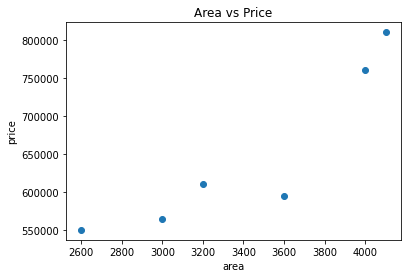

In [14]:
plt.xlabel('area')
plt.ylabel('price')
plt.title('Area vs Price')
plt.scatter(df.area,df.price)

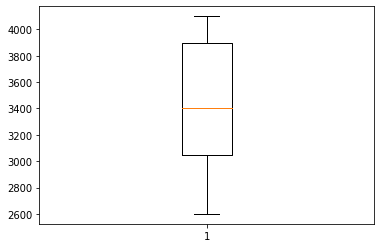

In [15]:
plt.boxplot(df.area)
plt.show()

#### boxplot dont show any outliers and scattter plot show almost 4 out of 6 points inline

### bedrooms vs price

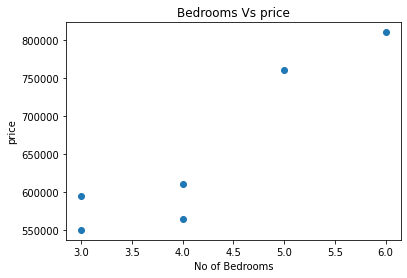

In [20]:
plt.xlabel('No of Bedrooms')
plt.ylabel('price')
plt.title('Bedrooms Vs price')
plt.scatter(df.bedrooms,df.price)

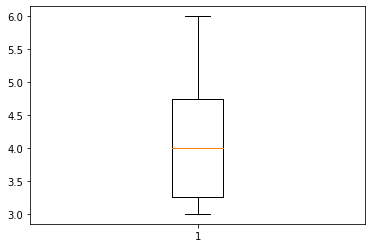

In [19]:
plt.boxplot(df.bedrooms)
plt.show()

#### we have almost same result as area wrt price 

### age of property vs price

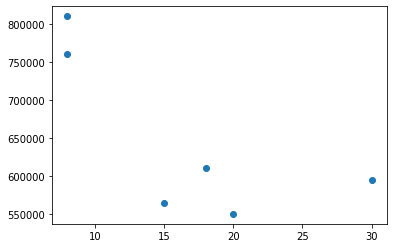

In [21]:
plt.scatter(df.age,df.price)

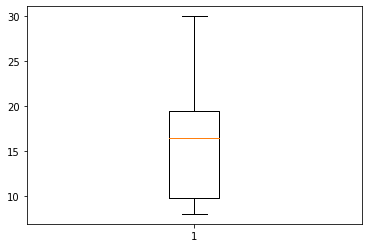

In [25]:
plt.boxplot(df.age)
plt.show()

#### here we cant say exactly from our data age and price has linear relationship, but as we know as age increase price decrease so we can assume age and price has linear graph

#### so from visualisation we can go with linear regression model 

In [28]:
from sklearn.linear_model import LinearRegression

In [38]:
X = df[['area','bedrooms','age']]

In [39]:
y = df.price

In [40]:
model = LinearRegression()

In [41]:
model.fit(X,y)

LinearRegression()

In [42]:
model.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [43]:
model.intercept_

221323.00186540443

In [45]:
model.score(X,y)*100

95.50196399325817

### our model has 95% accuracy

### predict price for value area=3000 bedrooms=3 age=40

In [46]:
model.predict([[3000,3,40]])

C:\Users\Rupali\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

#### for area 2000, 3 bedrooms, 5yr age price is?

In [48]:
model.predict([[3000,3,5]])

C:\Users\Rupali\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([611518.37838246])

#### in both predction as proprty has less age (new propert) price is high